 ### Done:
 
 - Winner ranks vs time
 - aces vs surface (grand slam, masters)
 - Federer vs Rafa wins on Grand Slam
 - average time of games in GS over years
 -  age of grand slam winners over time
 - number of double faults over time
 - average yearly upsets
 - Players who beat grand slam winners + after 2014
 

In [178]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import seaborn as sns
import numpy as np
import random
import os
import glob
sns.set_style('white')

%matplotlib inline

plt.rcParams.update({'font.size': 24})

In [2]:
path = './data/' 
files = glob.glob(path + "/*.csv")
tennis_df = pd.concat((pd.read_csv(f) for f in files))

In [3]:
tennis_df.shape

(274347, 49)

### Cleaning

In [4]:
tennis_df['tourney_yearmonth'] = tennis_df.tourney_date.astype(str).str[:6]
tennis_df['tourney_year'] = tennis_df.tourney_date.astype(str).str[:4]

In [5]:
tennis_df.loc[tennis_df['tourney_name'] == 'Us Open', 'tourney_name'] = 'US Open'

In [6]:
tennis_df = tennis_df[tennis_df['tourney_year']!='nan']
tennis_df.shape

(274284, 51)

In [7]:
tennis_df['tourney_year'] = tennis_df['tourney_year'].astype(int)

In [98]:
tennis_df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced', 'tourney_yearmonth', 'tourney_year'],
      dtype='object')

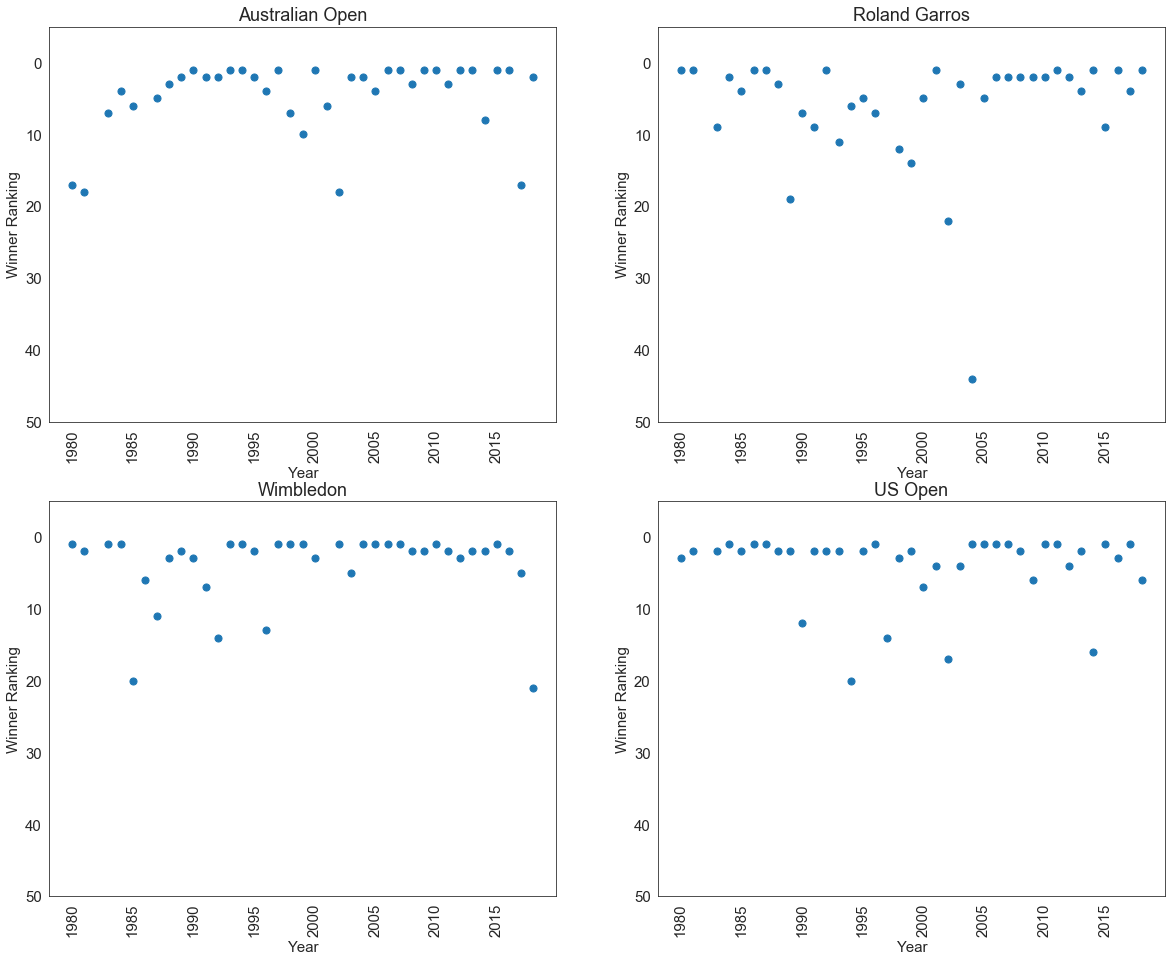

In [179]:
plt.rcParams.update({'font.size': 15})

tourneys = ['Australian Open','Roland Garros','Wimbledon','US Open']

tennis_df_1 = tennis_df[~np.isnan(tennis_df['winner_rank']) & (tennis_df['round']=='F')].copy().reset_index()
plt.figure(figsize=(20,16))

tennis_df_1['tourney_year'] = tennis_df_1['tourney_year'].astype(int)

for i in range(1,5):
    plt.subplot(2,2,i)
    plt.title(tourneys[i-1])
    plt.scatter(tennis_df_1[tennis_df_1['tourney_name']==tourneys[i-1]]['tourney_year'],
                tennis_df_1[tennis_df_1['tourney_name']==tourneys[i-1]]['winner_rank'],
               s = 50)
    plt.gca().invert_yaxis()
    plt.ylim(50,-5)
    plt.xlabel('Year')
    plt.xticks(rotation=90)
    plt.ylabel('Winner Ranking')

###Gastón Gaudio (ranked 44th[1][2]) won in the final 0–6, 3–6, 6–4, 6–1, 8–6, against Guillermo Coria. Gaudio became the first Argentine player to win the major since Guillermo Vilas in the 1979 Australian Open.

[Text(0,0.5,'Aces'), Text(0.5,0,'Surface')]

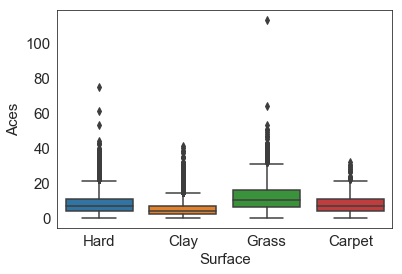

In [180]:
tennis_df_h = tennis_df[~np.isnan(tennis_df['w_ace']) & (tennis_df['tourney_level'].isin(['G','M'])) ].copy()
g = sns.boxplot(x="surface", y="w_ace", data=tennis_df_h)
g.set(xlabel='Surface', ylabel='Aces')

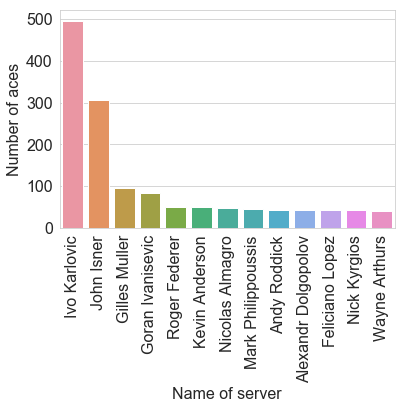

In [229]:
a = tennis_df_h[['tourney_year','tourney_name', 'winner_name', 'w_ace']]
a = a[a['w_ace']>40]
b = a.groupby('winner_name').sum().reset_index()
c = b.sort_values(by = 'w_ace', ascending = False).head(15)
sns.barplot(c['winner_name'], c['w_ace'])
plt.xticks(rotation = 90)
plt.xlabel('Name of server')
plt.ylabel('Number of aces');

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

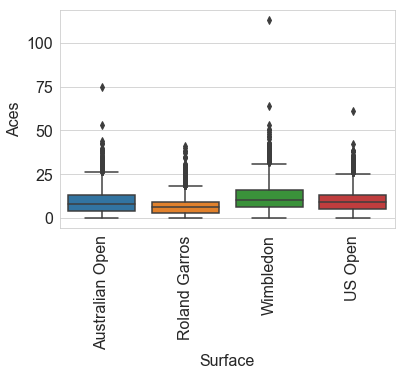

In [231]:
tennis_df_h = tennis_df[~np.isnan(tennis_df['w_ace']) & (tennis_df['tourney_level'].isin(['G'])) ].copy()
g = sns.boxplot(x="tourney_name", y="w_ace", data=tennis_df_h)
g.set(xlabel='Surface', ylabel='Aces')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

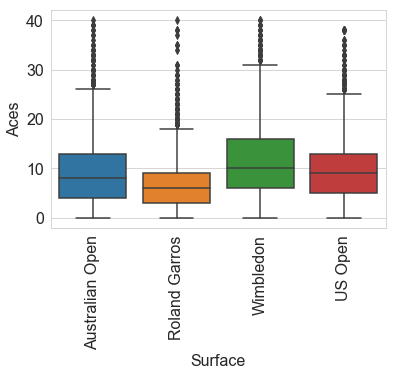

In [233]:
tennis_df_non_outliers = tennis_df[~np.isnan(tennis_df['w_ace']) & (tennis_df['tourney_level'].isin(['G'])) ].copy()
tennis_df_non_outliers = tennis_df_non_outliers[tennis_df_non_outliers['w_ace'] <=40]
g = sns.boxplot(x="tourney_name", y="w_ace", data=tennis_df_non_outliers)
g.set(xlabel='Surface', ylabel='Aces')
plt.xticks(rotation = 90)

[Text(0,0.5,'Aces'), Text(0.5,0,'Surface')]

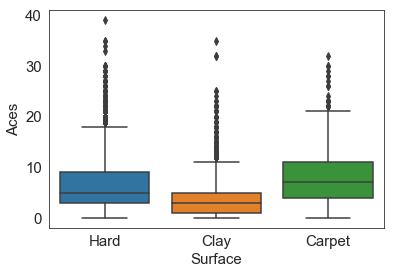

In [12]:
tennis_df_h = tennis_df[~np.isnan(tennis_df['w_ace']) & (tennis_df['tourney_level'].isin(['M'])) ].copy()
g = sns.boxplot(x="surface", y="w_ace", data=tennis_df_h)
g.set(xlabel='Surface', ylabel='Aces')

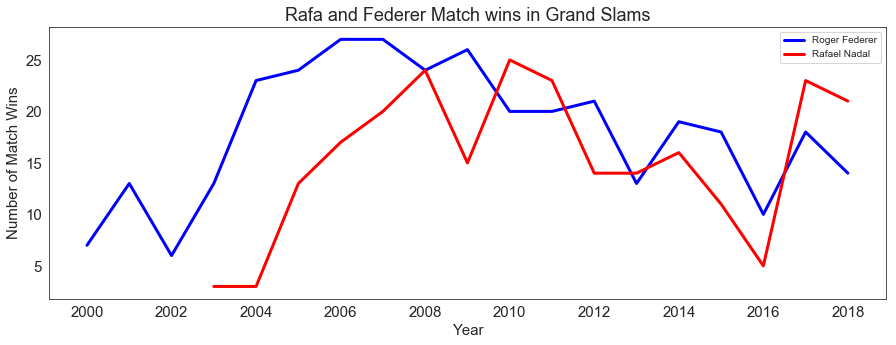

In [182]:
from matplotlib.ticker import MultipleLocator, StrMethodFormatter

def plot_history_player(player1, player2):
    
    pldf_1 = tennis_df[(tennis_df['winner_name'] == player1)].groupby(['tourney_year','tourney_level'], as_index=False).agg(['count'])
    pldf_2 = pldf_1['tourney_id'].reset_index()

    pldf_3 = tennis_df[(tennis_df['winner_name'] == player2)].groupby(['tourney_year','tourney_level'], as_index=False).agg(['count'])
    pldf_4 = pldf_3['tourney_id'].reset_index()
    
#     pldf_5 = tennis_df[(tennis_df['winner_name'] == player3)].groupby(['tourney_year','tourney_level'], as_index=False).agg(['count'])
#     pldf_6 = pldf_5['tourney_id'].reset_index()
    
#     pldf_7 = tennis_df[(tennis_df['winner_name'] == player4)].groupby(['tourney_year','tourney_level'], as_index=False).agg(['count'])
#     pldf_8 = pldf_7['tourney_id'].reset_index()
    
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 5))))

    plt.gca().xaxis.set_major_locator(MultipleLocator(2))
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))

    plt.title('Rafa and Federer Match wins in Grand Slams')
    plt.ylabel('Number of Match Wins')
    plt.xlabel('Year')

    plt.plot(pldf_2[pldf_2['tourney_level']=='G']['tourney_year'], pldf_2[pldf_2['tourney_level']=='G']['count'], color='blue', markersize=2, linewidth=3)
    plt.plot(pldf_4[pldf_4['tourney_level']=='G']['tourney_year'], pldf_4[pldf_4['tourney_level']=='G']['count'], color='red', markersize=2, linewidth=3)
#     plt.plot(pldf_6[pldf_2['tourney_level']=='G']['tourney_year'], pldf_6[pldf_2['tourney_level']=='G']['count'], color='orange', markersize=2, linewidth=3)
#     plt.plot(pldf_8[pldf_2['tourney_level']=='G']['tourney_year'], pldf_8[pldf_2['tourney_level']=='G']['count'], color='green', markersize=2, linewidth=3)

    plt.legend(['Roger Federer', 'Rafael Nadal'], loc='upper right', prop={'size': 10})
  
plot_history_player('Roger Federer', 'Rafael Nadal')

In [15]:
tennis_g_df = tennis_df[(tennis_df['tourney_level'] == 'G') & (tennis_df['tourney_year']>1995)]
tennis_new = tennis_g_df.groupby(['tourney_year', 'tourney_name']).mean().reset_index()
tennis_new.head()

,tourney_year,tourney_name,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,winner_rank,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,1996,Australian Open,128.0,19960115.0,64.0,101857.149606,6.136364,184.842520,25.157788,58.464567,...,8.058333,5.825000,4.891667,125.833333,77.225000,51.275000,19.733333,17.266667,7.558333,13.591667
1,1996,Roland Garros,128.0,19960527.0,64.0,101913.015748,8.312500,186.314961,25.191612,41.212598,...,8.110236,5.330709,4.062992,122.188976,74.440945,48.937008,19.960630,16.984252,7.448819,13.519685
2,1996,US Open,128.0,19960826.0,64.0,101910.362205,5.783784,185.166667,25.493271,52.535433,...,7.285714,7.095238,6.357143,125.523810,69.833333,49.333333,22.849206,17.206349,6.436508,11.936508
3,1996,Wimbledon,128.0,19960624.0,64.0,101908.488189,10.500000,186.619048,25.291145,75.834646,...,6.981982,7.576577,6.909910,128.432432,76.180180,54.405405,20.612613,17.378378,6.540541,11.720721
4,1997,Australian Open,128.0,19970113.0,64.0,102068.401575,7.021739,183.937008,24.842266,53.307087,...,6.891892,5.693694,5.207207,118.225225,71.918919,48.288288,17.432432,16.252252,6.918919,12.891892


In [16]:
tennis_new.loc[tennis_new['tourney_name'] == 'Us Open', 'tourney_name'] = 'US Open'

In [17]:
tennis_new.head()

,tourney_year,tourney_name,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,winner_rank,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,1996,Australian Open,128.0,19960115.0,64.0,101857.149606,6.136364,184.842520,25.157788,58.464567,...,8.058333,5.825000,4.891667,125.833333,77.225000,51.275000,19.733333,17.266667,7.558333,13.591667
1,1996,Roland Garros,128.0,19960527.0,64.0,101913.015748,8.312500,186.314961,25.191612,41.212598,...,8.110236,5.330709,4.062992,122.188976,74.440945,48.937008,19.960630,16.984252,7.448819,13.519685
2,1996,US Open,128.0,19960826.0,64.0,101910.362205,5.783784,185.166667,25.493271,52.535433,...,7.285714,7.095238,6.357143,125.523810,69.833333,49.333333,22.849206,17.206349,6.436508,11.936508
3,1996,Wimbledon,128.0,19960624.0,64.0,101908.488189,10.500000,186.619048,25.291145,75.834646,...,6.981982,7.576577,6.909910,128.432432,76.180180,54.405405,20.612613,17.378378,6.540541,11.720721
4,1997,Australian Open,128.0,19970113.0,64.0,102068.401575,7.021739,183.937008,24.842266,53.307087,...,6.891892,5.693694,5.207207,118.225225,71.918919,48.288288,17.432432,16.252252,6.918919,12.891892


### Average time of games

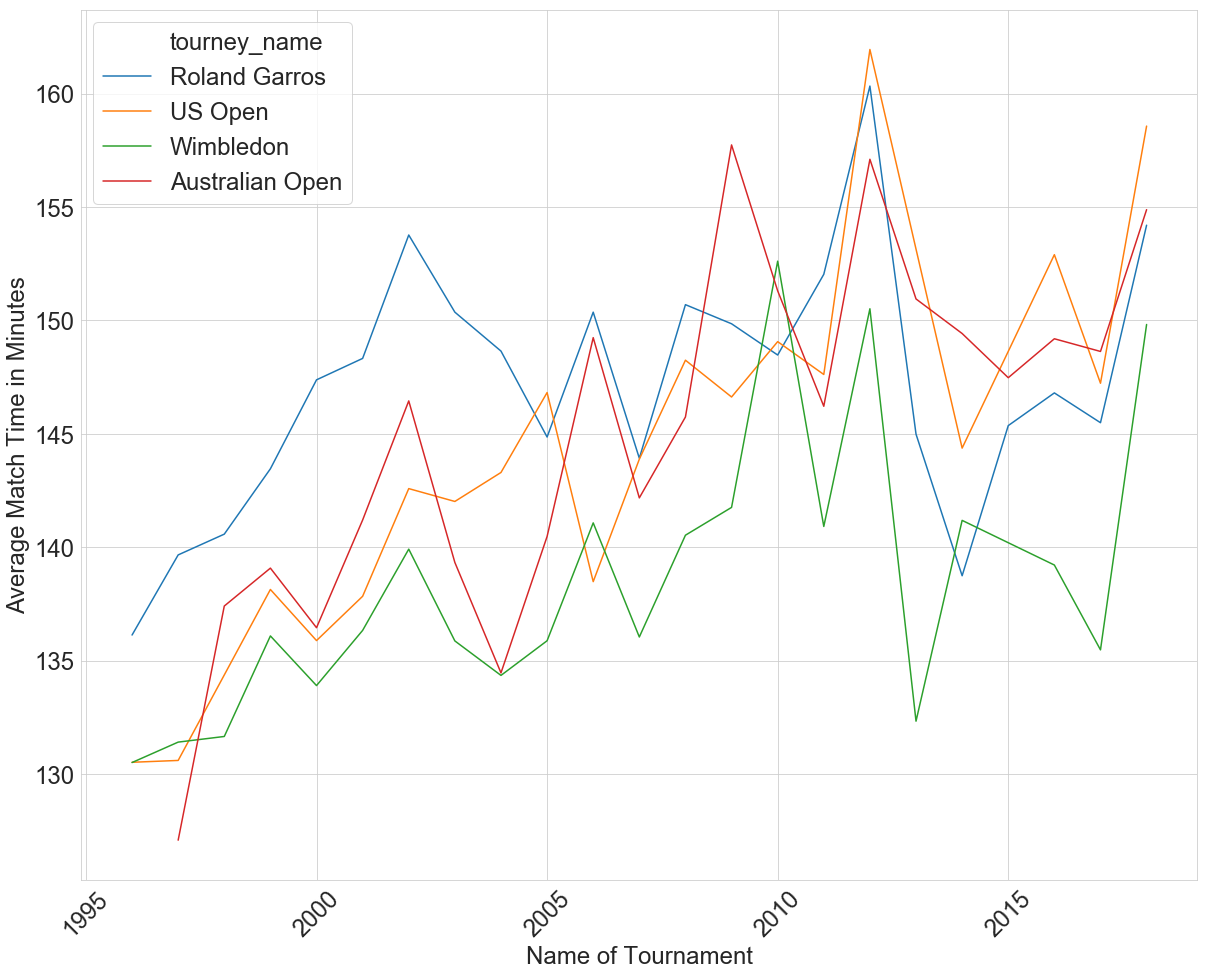

In [235]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,16))
tennis_new = tennis_new[~((tennis_new['tourney_year']==1996) & (tennis_new['tourney_name'] == 'Australian Open'))]
tennis_new = tennis_new[~((tennis_new['tourney_year']==1998) & (tennis_new['tourney_name'] == 'US Open'))]
plt.rcParams.update({'font.size': 24})
g = sns.lineplot(tennis_new['tourney_year'], tennis_new['minutes'], hue = tennis_new['tourney_name'])
plt.xticks(rotation=45)
plt.xlabel('Name of Tournament')
plt.ylabel('Average Match Time in Minutes');

### Age of Grand Slam Winners

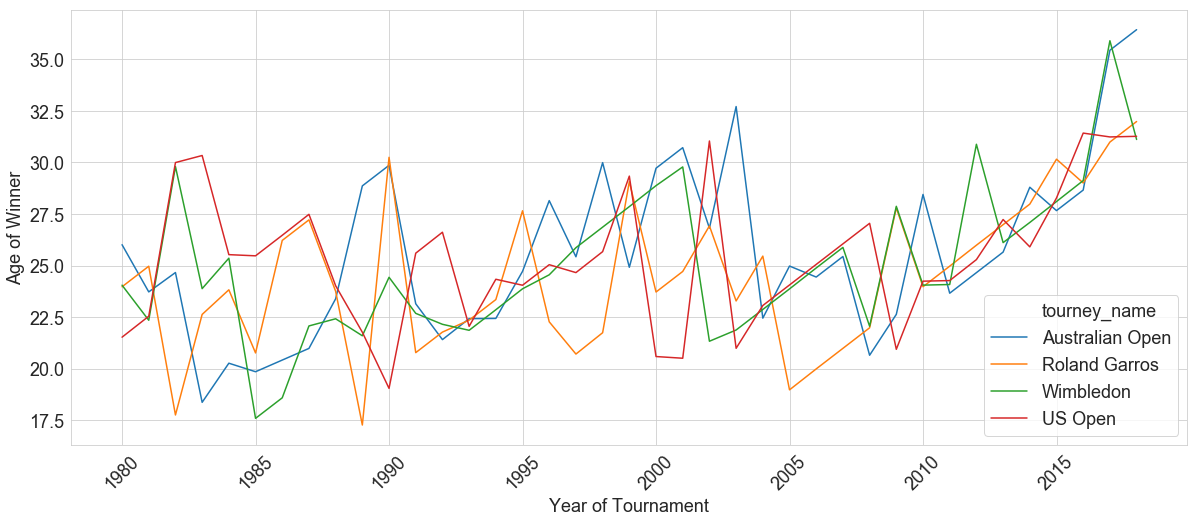

In [190]:
plt.rcParams.update({'font.size': 18})
tennis_df_win= (
    tennis_df[(tennis_df['tourney_level']=='G') & (tennis_df['round']=='F')]
    .dropna(subset=['winner_age'])
)
plt.figure(figsize=(20,8))
g = sns.lineplot(tennis_df_win['tourney_year'], tennis_df_win['winner_age'], hue = tennis_df_win['tourney_name'])
plt.xticks(rotation=45)
plt.xlabel('Year of Tournament')
plt.ylabel('Age of Winner');

In [23]:
tennis_double = tennis_df.copy()

In [46]:
tennis_double = tennis_double[tennis_double['tourney_level'] == 'G']

In [47]:
tennis_double['total_df'] = tennis_double['w_df'] + tennis_double['l_df']
tennis_double.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,tourney_yearmonth,tourney_year,total_df
139,2018-580,Australian Open,Hard,128.0,G,20180115.0,101.0,104745.0,1.0,NaN,...,61.0,40.0,19.0,5.0,10.0,4.0,12.0,201801,2018,2.0
140,2018-580,Australian Open,Hard,128.0,G,20180115.0,102.0,104919.0,NaN,NaN,...,123.0,74.0,50.0,20.0,15.0,12.0,16.0,201801,2018,2.0
141,2018-580,Australian Open,Hard,128.0,G,20180115.0,103.0,105357.0,NaN,NaN,...,79.0,48.0,27.0,14.0,14.0,2.0,8.0,201801,2018,6.0
142,2018-580,Australian Open,Hard,128.0,G,20180115.0,104.0,106000.0,28.0,NaN,...,179.0,92.0,68.0,41.0,24.0,8.0,13.0,201801,2018,10.0
143,2018-580,Australian Open,Hard,128.0,G,20180115.0,105.0,106043.0,24.0,NaN,...,183.0,126.0,78.0,24.0,29.0,13.0,24.0,201801,2018,15.0


In [52]:
tennis_g_double = tennis_double.groupby(['tourney_year','tourney_name']).mean().reset_index()

In [53]:
tennis_g_double

,tourney_year,tourney_name,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,winner_rank,...,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,total_df
0,1980,Australian Open,64.0,19801226.0,32.000000,100390.857143,8.742857,185.049180,25.856567,54.689655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980,Roland Garros,128.0,19800526.0,64.000000,100388.267717,6.812500,180.387931,25.443753,63.984252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1980,US Open,128.0,19800826.0,64.000000,100447.866142,7.361702,182.932773,24.504778,68.778689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1980,Wimbledon,128.0,19800623.0,64.000000,100353.881890,6.085106,183.083333,26.590330,61.669291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1981,Australian Open,64.0,19811224.0,32.000000,100437.746032,7.142857,184.526316,26.011712,121.683333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1981,Roland Garros,128.0,19810525.0,64.000000,100463.031496,7.326531,181.500000,25.117755,61.117647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1981,US Open,128.0,19810901.0,64.000000,100451.763780,7.185185,182.406504,25.395334,69.286885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1981,Wimbledon,128.0,19810622.0,64.000000,100488.259843,6.914286,184.166667,25.894071,74.285714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1982,Australian Open,96.0,19821202.0,48.000000,100671.357895,6.976744,184.423529,25.488861,123.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1982,Roland Garros,128.0,19820524.0,64.000000,100579.976378,7.183673,182.065574,24.328368,107.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


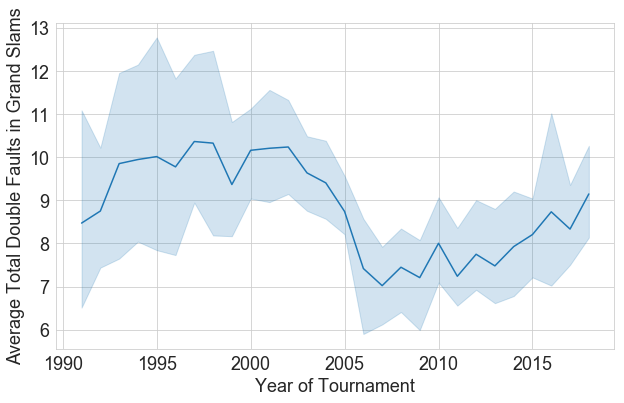

In [191]:
plt.figure(figsize = (10,6))
sns.lineplot(tennis_g_double['tourney_year'], tennis_g_double['total_df'])
plt.xlabel('Year of Tournament')
plt.ylabel('Average Total Double Faults in Grand Slams');

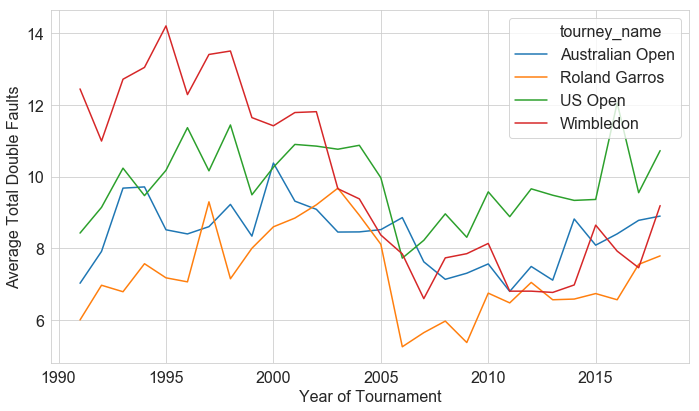

In [197]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize = (10,6))
sns.lineplot(tennis_g_double['tourney_year'], tennis_g_double['total_df'], hue = tennis_g_double['tourney_name'])
plt.xlabel('Year of Tournament')
plt.ylabel('Average Total Double Faults')
plt.tight_layout(); 

In [65]:
#http://www.physics.usyd.edu.au/~cross/GrandSlamStatistics.htm

In [78]:
combined = tennis_df.copy()
combined = combined[combined['tourney_level'] == 'G']

In [94]:
## Upsets
def upset_plot_tour(combined, Threshold, Rolling, Years):

    combined['upset'] = combined.winner_rank - combined.loser_rank >= Threshold
    
    # Filter to only consider user-selected year range:
    combined = combined.loc[(combined.tourney_year >= Years[0]) & (combined.tourney_year <= Years[1])]
    
    # Calculate total upsets by year and tour
    combined_upsets = pd.DataFrame(
        combined.groupby(['tourney_year', 'tourney_name'])['upset'].sum())
        
    # Calculate total matches by year and tour
    combined_total_matches = pd.DataFrame(
        combined.groupby(['tourney_year','tourney_name'])['upset'].apply(lambda x: x.shape[0]))
 
    # Generate plot
    
    # Create figure and axes (2) for subplots
    # Set axis and figure settings
    fig, (ax) = plt.subplots(ncols=1)
    ax.set_ylabel("Percentage Resulting in Upset", fontsize=16)
    ax.tick_params(labelsize=12)
    fig.patch.set_facecolor('white')
    fig.set_size_inches(8, 8)
    fig.suptitle("Yearly Average of Upsets by Tour\n"+
                 "(Upset: Winner Rank - Loser Rank ≥ " + str(Threshold)+")", fontsize=20)
    
    # Plot
    combined_plot = pd.DataFrame(
        combined_upsets.div(combined_total_matches)*100).reset_index(
        level=['tourney_year', 'tourney_name']).pivot(
        index='tourney_year', columns='tourney_name', values='upset').rename_axis(
        '').rolling(Rolling).mean().plot(
        kind='line',
        xlim=[Years[0], Years[1]],
        ylim=[0, 50],
        ax=ax)


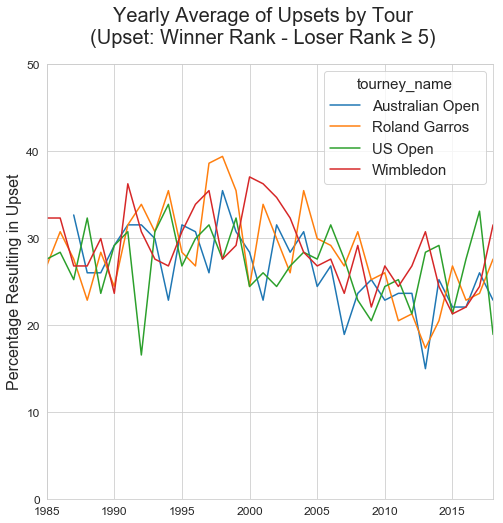

In [95]:
upset_plot_tour(combined, 5, 1, [1985,2018])

In [96]:
tennis_2018 = tennis_df[tennis_df['tourney_year'] == 2018]

In [97]:
tennis_2018.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,tourney_yearmonth,tourney_year
0,2018-M020,Brisbane,Hard,32.0,A,20180101.0,300.0,106401.0,3.0,NaN,...,3.0,58.0,32.0,22.0,12.0,9.0,4.0,7.0,201801,2018
1,2018-M020,Brisbane,Hard,32.0,A,20180101.0,299.0,106401.0,3.0,NaN,...,6.0,74.0,44.0,32.0,16.0,13.0,3.0,6.0,201801,2018
2,2018-M020,Brisbane,Hard,32.0,A,20180101.0,298.0,105992.0,NaN,NaN,...,5.0,94.0,62.0,49.0,16.0,16.0,0.0,3.0,201801,2018
3,2018-M020,Brisbane,Hard,32.0,A,20180101.0,297.0,105777.0,1.0,NaN,...,1.0,89.0,53.0,39.0,23.0,15.0,4.0,6.0,201801,2018
4,2018-M020,Brisbane,Hard,32.0,A,20180101.0,296.0,106401.0,3.0,NaN,...,3.0,75.0,41.0,33.0,16.0,13.0,2.0,4.0,201801,2018


In [198]:
grand_slam_winners = ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic', 'Andy Murray',
                      'Sam Querry', 'Stanislas Wawrinka', 'Marin Cilic'
                      ]

In [199]:
tennis_2010 = tennis_df[(tennis_df['tourney_year'] >= 2010)]

In [200]:
winning_players = tennis_2010[
    (tennis_2010['loser_name'].isin(grand_slam_winners)) &
    ~(tennis_2010['winner_name'].isin(grand_slam_winners))
]['winner_name'].value_counts().reset_index().iloc[:10]

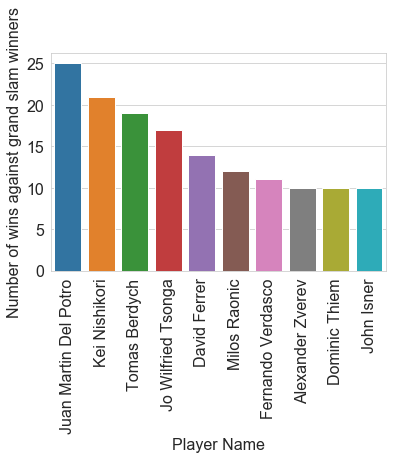

In [201]:
sns.barplot(winning_players['index'], winning_players['winner_name'])
plt.xticks(rotation=90)
plt.xlabel('Player Name')
plt.ylabel('Number of wins against grand slam winners');

In [202]:
tennis_2014 = tennis_df[(tennis_df['tourney_year'] >= 2014)]

In [203]:
winning_players_2014 = tennis_2014[
    (tennis_2014['loser_name'].isin(grand_slam_winners)) &
    ~(tennis_2014['winner_name'].isin(grand_slam_winners))
]['winner_name'].value_counts().reset_index().iloc[:10]

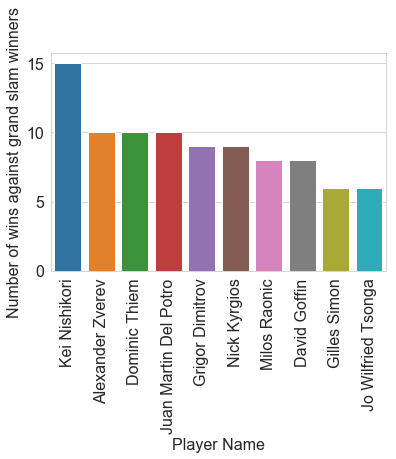

In [204]:
sns.barplot(winning_players_2014['index'], winning_players_2014['winner_name'])
plt.xticks(rotation=90)
plt.xlabel('Player Name')
plt.ylabel('Number of wins against grand slam winners');
